# Bài tập
1. Dùng 2 thuật toán Gradient Descent còn lại để tìm bộ Weight theo Heigh trong data fish
2. Dùng 3 thuật toán Gradient Descent đã học để tìm bộ Weight theo Height và Width trong data fish
3. Cho biết Weights tốt nhất cho các mô hình trên (Gợi ý: Nên lưu lại từng bộ Weights sau mỗi epoch) (cho câu 2 cả 3 thuật toán)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# BGD
def bgd(w, learning_rate, iterations):
    global X, y, n
    
    
    def grad(w):
        return 1/n * X.T.dot(X.dot(w) - y)
    
    
    for i in range(iterations):
        w = w - learning_rate * grad(w)
        loss = np.mean(np.square(X.dot(w) - y))
        print(f'Loss at iter {i}: {loss}')
        
        
    print(f'Final loss: {loss}')
    print(f'Final W: {w}')
    return w


# SGD
def sgd(w, learning_rate, iterations):
    global X, y, n
    
    
    def grad(w):
        return X_j.T.dot(X_j.dot(w) - y_j)
        
        
    for i in range(iterations):
        rd_id = np.random.permutation(n)
        
        
        for j in rd_id:
            X_j = np.array([X[j,:]])
            y_j = np.array([y[j,:]])
            w = w - learning_rate * grad(w)
            
            
        loss = np.mean(np.square(X.dot(w) - y))
        print(f'Loss at iter {i}: {loss}')
        
        
    print(f'Final loss: {loss}')
    print(f'Final W: {w}')
    return w


# Mini GD
def mgd(w, learning_rate, iterations):
    global X, y, n
    first_X = X.copy()
    first_y = y.copy()
    
    
    def grad(w):
        n_j = X_j.shape[0]
        return 1/n_j * X_j.T.dot(X_j.dot(w)-y_j)
        
        
    for i in range(iterations):
        indices = np.random.permutation(n)
        first_X = first_X[indices]
        first_y = first_y[indices]
        temp = 20
        
        
        for j in range(0, n, temp):
            X_j = first_X[j:temp,:]
            y_j = first_y[j:temp,:]
            w = w - learning_rate * grad(w)
            temp += temp if n - temp >= temp else n         
            
            
        loss = np.mean(np.square(X.dot(w) - y))
        print(f'Loss at iter {i}: {loss}')
        
        
    print(f'Final loss: {loss}')
    print(f'Final W: {w}')
    return w

In [3]:
# Load Fish dataset
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Câu 1

In [4]:
# Data
X_0 = np.array([df['Height'].values]).T
y = np.array([df['Weight'].values]).T

In [5]:
# Add one to X
X = np.concatenate((X_0, np.ones((X_0.shape[0], 1))), axis=1)


# n samples
n = X.shape[0]


# Initial w
w = np.array([[1647], [0]])

# BGD

In [6]:
w_bgd = bgd(w, 0.01, 10)

Loss at iter 0: 65613.75546247416
Loss at iter 1: 60529.033818627446
Loss at iter 2: 60528.93148128281
Loss at iter 3: 60528.93147858013
Loss at iter 4: 60528.93147793944
Loss at iter 5: 60528.931477301136
Loss at iter 6: 60528.93147666518
Loss at iter 7: 60528.93147603154
Loss at iter 8: 60528.93147540025
Loss at iter 9: 60528.931474771256
Final loss: 60528.931474771256
Final W: [[  60.49911967]
 [-144.41638418]]


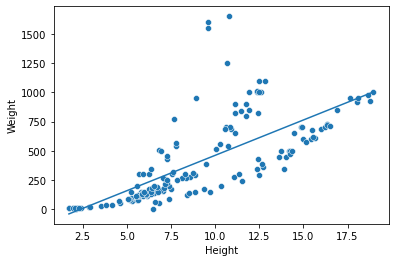

In [7]:
fig1=sns.scatterplot(x="Height",y="Weight",data=df)
fig2=sns.lineplot(x=df.loc[:,"Height"].values,y=np.matmul(X,w_bgd).reshape(-1,))

# SGD

In [8]:
w_sgd = sgd(w, 0.0001, 10)

Loss at iter 0: 10440168.367042892
Loss at iter 1: 487845.607076235
Loss at iter 2: 78914.67804159746
Loss at iter 3: 60915.67518865258
Loss at iter 4: 60561.047295139695
Loss at iter 5: 60646.43429511793
Loss at iter 6: 60585.87501439544
Loss at iter 7: 60632.153955629925
Loss at iter 8: 60544.5933936053
Loss at iter 9: 60530.48514475008
Final loss: 60530.48514475008
Final W: [[  60.50379165]
 [-143.20659313]]


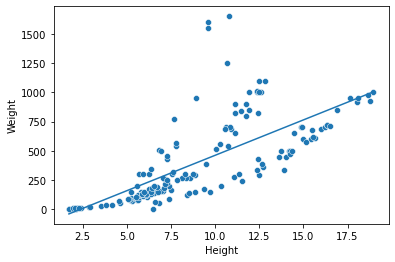

In [9]:
fig1=sns.scatterplot(x="Height",y="Weight",data=df)
fig2=sns.lineplot(x=df.loc[:,"Height"].values,y=np.matmul(X,w_sgd).reshape(-1,))

# Mini GD

In [10]:
w_mgd = mgd(w, 0.001, 10)

Loss at iter 0: 44712115.28325292
Loss at iter 1: 8488778.397851242
Loss at iter 2: 1640106.6993217221
Loss at iter 3: 360458.1602083155
Loss at iter 4: 116214.30614825104
Loss at iter 5: 69579.68228704778
Loss at iter 6: 61733.03529879308
Loss at iter 7: 60532.81441427347
Loss at iter 8: 60529.446878344395
Loss at iter 9: 60560.46883975206
Final loss: 60560.46883975206
Final W: [[  59.90064115]
 [-144.04775739]]


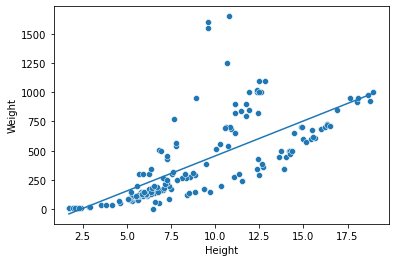

In [11]:
fig1=sns.scatterplot(x="Height",y="Weight",data=df)
fig2=sns.lineplot(x=df.loc[:,"Height"].values,y=np.matmul(X,w_mgd).reshape(-1,))

# Câu 2

In [12]:
from sklearn.model_selection import train_test_split


# Split the data/targets into training/testing sets
X_train,X_test,y_train,y_test=train_test_split(df.loc[:,["Height","Width"]].values,df.loc[:,"Weight"].values,test_size=0.2,random_state=1)
y_train=y_train.reshape(-1,1)


y = y_train

In [13]:
# Add one to X
X = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)


# n samples
n = X.shape[0]


# Initial w
w = np.array([[-300], [450],  [-360]])

# BGD

In [14]:
w_bgd = bgd(w, 0.01, 1000)

Loss at iter 0: 360544.8942394762
Loss at iter 1: 211816.0425692724
Loss at iter 2: 199608.11411430902
Loss at iter 3: 194600.74201557238
Loss at iter 4: 190082.49309923415
Loss at iter 5: 185702.1667112621
Loss at iter 6: 181438.57021531017
Loss at iter 7: 177287.70825103938
Loss at iter 8: 173246.5540808811
Loss at iter 9: 169312.20573071827
Loss at iter 10: 165481.8402465166
Loss at iter 11: 161752.70940404382
Loss at iter 12: 158122.1376195814
Loss at iter 13: 154587.52002414444
Loss at iter 14: 151146.32059421777
Loss at iter 15: 147796.07033218697
Loss at iter 16: 144534.36549487468
Loss at iter 17: 141358.86586889674
Loss at iter 18: 138267.29309159936
Loss at iter 19: 135257.42901637452
Loss at iter 20: 132327.1141211775
Loss at iter 21: 129474.24595910804
Loss at iter 22: 126696.777649941
Loss at iter 23: 123992.7164115256
Loss at iter 24: 121360.12212999881
Loss at iter 25: 118797.10596778765
Loss at iter 26: 116301.82900840079
Loss at iter 27: 113872.50093703854
Loss at iter

# SGD

In [15]:
w_sgd = sgd(w, 0.0001, 1000)

Loss at iter 0: 356261.3270854659
Loss at iter 1: 206287.13422300213
Loss at iter 2: 195009.86491034867
Loss at iter 3: 189104.40043700533
Loss at iter 4: 183737.39728259767
Loss at iter 5: 178282.2630712012
Loss at iter 6: 173265.7171341265
Loss at iter 7: 168813.46413273583
Loss at iter 8: 163772.44434886143
Loss at iter 9: 159326.70092119792
Loss at iter 10: 154413.3857154744
Loss at iter 11: 149973.0715120363
Loss at iter 12: 145735.15042449298
Loss at iter 13: 141682.61551449398
Loss at iter 14: 137979.92203036038
Loss at iter 15: 133960.54819657688
Loss at iter 16: 130318.2342934923
Loss at iter 17: 126808.46730669831
Loss at iter 18: 123429.39034240431
Loss at iter 19: 120057.64710363203
Loss at iter 20: 116837.35019078194
Loss at iter 21: 113920.67274681768
Loss at iter 22: 111477.40890236126
Loss at iter 23: 108053.0840366537
Loss at iter 24: 105110.63523478276
Loss at iter 25: 102386.65977905323
Loss at iter 26: 99787.67393568989
Loss at iter 27: 97294.560302363
Loss at iter 

Loss at iter 277: 24401.05964650781
Loss at iter 278: 24397.999320247294
Loss at iter 279: 24408.977992368924
Loss at iter 280: 24401.17190653333
Loss at iter 281: 24406.810954216377
Loss at iter 282: 24397.24473037203
Loss at iter 283: 24401.12232961087
Loss at iter 284: 24537.932469767857
Loss at iter 285: 24401.84956414783
Loss at iter 286: 24414.69868009172
Loss at iter 287: 24394.79702274969
Loss at iter 288: 24396.88016626737
Loss at iter 289: 24402.948685214717
Loss at iter 290: 24393.338905836277
Loss at iter 291: 24394.94649569734
Loss at iter 292: 24439.87764031685
Loss at iter 293: 24465.610948780555
Loss at iter 294: 24395.006480538592
Loss at iter 295: 24435.074325241338
Loss at iter 296: 24433.465799052785
Loss at iter 297: 24440.796228825482
Loss at iter 298: 24447.285518317593
Loss at iter 299: 24435.840374171832
Loss at iter 300: 24409.29218486522
Loss at iter 301: 24397.59448928812
Loss at iter 302: 24421.954986725144
Loss at iter 303: 24433.63119914586
Loss at iter 3

Loss at iter 556: 24437.96813412082
Loss at iter 557: 24408.013652337493
Loss at iter 558: 24393.983846552983
Loss at iter 559: 24406.266749959475
Loss at iter 560: 24395.76008516197
Loss at iter 561: 24408.01140158723
Loss at iter 562: 24384.236533670362
Loss at iter 563: 24383.455159913807
Loss at iter 564: 24514.63520857612
Loss at iter 565: 24384.52873075832
Loss at iter 566: 24444.31398969486
Loss at iter 567: 24407.96117606963
Loss at iter 568: 24395.277917387983
Loss at iter 569: 24383.373495374264
Loss at iter 570: 24383.43895388069
Loss at iter 571: 24429.100784773967
Loss at iter 572: 24397.51337532011
Loss at iter 573: 24402.113801399923
Loss at iter 574: 24387.1072012399
Loss at iter 575: 24403.50324849237
Loss at iter 576: 24396.520093332667
Loss at iter 577: 24390.51983013841
Loss at iter 578: 24389.511517820298
Loss at iter 579: 24383.44065268691
Loss at iter 580: 24434.50362531014
Loss at iter 581: 24386.20862583802
Loss at iter 582: 24428.07266091133
Loss at iter 583: 

Loss at iter 835: 24418.868760602418
Loss at iter 836: 24383.20158567547
Loss at iter 837: 24384.636804858754
Loss at iter 838: 24459.459916202944
Loss at iter 839: 24384.874453876586
Loss at iter 840: 24464.692933544997
Loss at iter 841: 24507.852329688085
Loss at iter 842: 24384.086524640246
Loss at iter 843: 24397.040867826625
Loss at iter 844: 24393.31396318848
Loss at iter 845: 24412.269147072027
Loss at iter 846: 24385.05027891976
Loss at iter 847: 24389.67870721941
Loss at iter 848: 24383.385822703185
Loss at iter 849: 24660.892806561573
Loss at iter 850: 24439.385114272063
Loss at iter 851: 24398.395565508567
Loss at iter 852: 24396.798965622085
Loss at iter 853: 24390.788242174112
Loss at iter 854: 24383.28440245008
Loss at iter 855: 24406.697125728973
Loss at iter 856: 24401.26223472959
Loss at iter 857: 24401.646355898924
Loss at iter 858: 24383.340951543338
Loss at iter 859: 24421.983849657998
Loss at iter 860: 24384.439136646313
Loss at iter 861: 24616.2390161396
Loss at i

# Mini GD

In [16]:
w_mgd = mgd(w, 0.001, 1000)

Loss at iter 0: 692759.3825045435
Loss at iter 1: 262518.4853988451
Loss at iter 2: 225670.13443110118
Loss at iter 3: 204493.34354680232
Loss at iter 4: 197699.2086275479
Loss at iter 5: 194173.2832150736
Loss at iter 6: 192203.8990232646
Loss at iter 7: 193906.7182491496
Loss at iter 8: 191863.91462763574
Loss at iter 9: 185844.65910086068
Loss at iter 10: 180584.643874998
Loss at iter 11: 176334.4692515249
Loss at iter 12: 173139.95844041352
Loss at iter 13: 173405.0301080581
Loss at iter 14: 168717.67825520146
Loss at iter 15: 165389.50767860882
Loss at iter 16: 162533.97087884133
Loss at iter 17: 159519.53120934567
Loss at iter 18: 157170.31466865298
Loss at iter 19: 154738.46554696947
Loss at iter 20: 154254.78010294502
Loss at iter 21: 150369.34870050658
Loss at iter 22: 148375.81699732464
Loss at iter 23: 146405.7341782131
Loss at iter 24: 144349.29170369223
Loss at iter 25: 141837.5814245805
Loss at iter 26: 138821.19303968843
Loss at iter 27: 136831.32102226897
Loss at iter 2

Loss at iter 511: 24407.691412954544
Loss at iter 512: 25183.50486742998
Loss at iter 513: 24831.74908997275
Loss at iter 514: 24536.942772075312
Loss at iter 515: 24404.49614025996
Loss at iter 516: 24475.003460141514
Loss at iter 517: 24457.89000463126
Loss at iter 518: 24445.981173450953
Loss at iter 519: 24410.231859424333
Loss at iter 520: 24491.47400793214
Loss at iter 521: 24619.71349647418
Loss at iter 522: 24465.523570166464
Loss at iter 523: 24542.272562481645
Loss at iter 524: 24559.80549679
Loss at iter 525: 24417.085520690085
Loss at iter 526: 24531.75330721695
Loss at iter 527: 24506.89266608565
Loss at iter 528: 24589.29685257501
Loss at iter 529: 24510.32127809983
Loss at iter 530: 24409.962890213308
Loss at iter 531: 24411.899368905295
Loss at iter 532: 24404.95261890003
Loss at iter 533: 24430.55377602714
Loss at iter 534: 24437.062519892104
Loss at iter 535: 24519.464212864572
Loss at iter 536: 24479.062934363075
Loss at iter 537: 24758.798692702123
Loss at iter 538:

# Câu 3

In [17]:
X_t = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)
y_t = np.array([y_test]).T

In [18]:
# y predicted by bgd
y_bgd = X_t.dot(w_bgd)


print(np.linalg.norm(y_bgd - y_t))

1109.7784770553408


In [19]:
# y predicted by sgd
y_sgd = X_t.dot(w_sgd)


print(np.linalg.norm(y_sgd - y_t))

1108.3934666648445


In [20]:
# y predicted by mgd
y_mgd = X_t.dot(w_mgd)


print(np.linalg.norm(y_mgd - y_t))

1110.4328813614495


Kết quả của các thuật toán trên cho ra là gần nhau. Dựa vào các kết quả trên ta thấy bộ Weights sinh bởi model SGD là tốt nhất.